# Seoul Bike Rental Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d saurabhshahane/seoul-bike-sharing-demand-prediction

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction
License(s): Attribution 4.0 International (CC BY 4.0)
100%|█████████████████████████████████████████| 126k/126k [00:00<00:00, 161kB/s]
100%|█████████████████████████████████████████| 126k/126k [00:00<00:00, 161kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Seoul Bike Sharing Demand Prediction/seoul-bike-sharing-demand-prediction.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Seoul Bike Sharing Demand Prediction')   

## Exploratory Data Analysis

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')

In [12]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df.shape

(8760, 14)

In [8]:
df.size

122640

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [13]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## Data Visualization

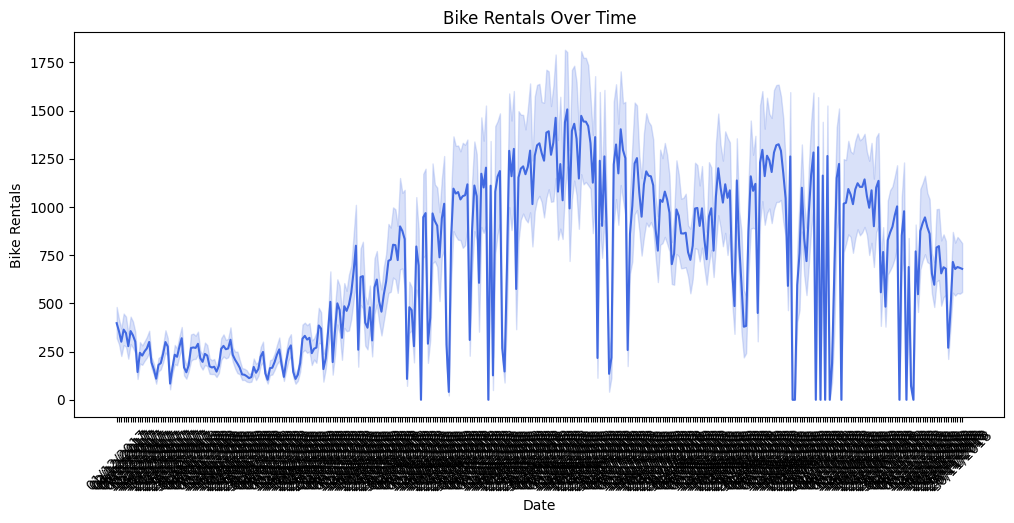

In [31]:
# Bike Rentals Over Time (Line Plot)

plt.figure(figsize=(12, 5))
sns.lineplot(x=df['Date'], y=df['Rented Bike Count'], color="royalblue")
plt.xlabel("Date")
plt.ylabel("Bike Rentals")
plt.title("Bike Rentals Over Time")
plt.xticks(rotation=45)
plt.show()

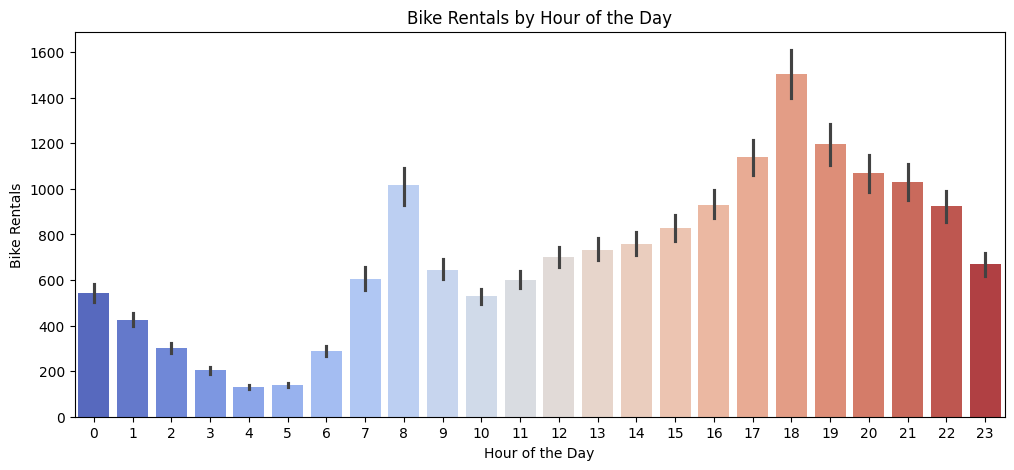

In [32]:
# Hourly Bike Rentals (Bar Plot)

plt.figure(figsize=(12, 5))
sns.barplot(x=df['Hour'], y=df['Rented Bike Count'], palette="coolwarm")
plt.xlabel("Hour of the Day")
plt.ylabel("Bike Rentals")
plt.title("Bike Rentals by Hour of the Day")
plt.show()

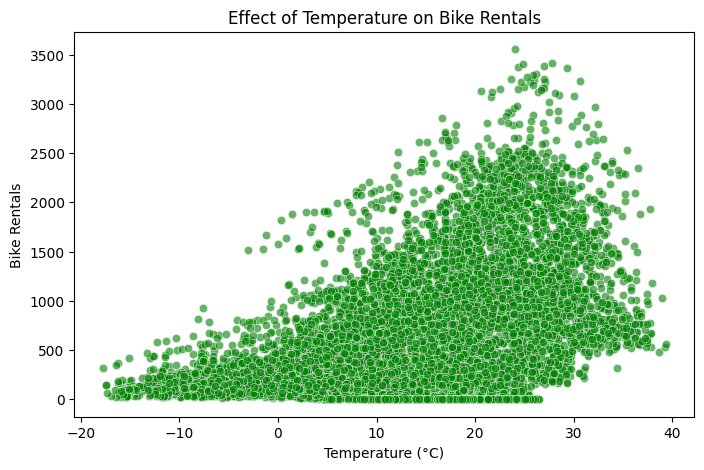

In [33]:
# Temperature vs. Bike Rentals (Scatter Plot)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Temperature(°C)'], y=df['Rented Bike Count'], color="green", alpha=0.6)
plt.xlabel("Temperature (°C)")
plt.ylabel("Bike Rentals")
plt.title("Effect of Temperature on Bike Rentals")
plt.show()

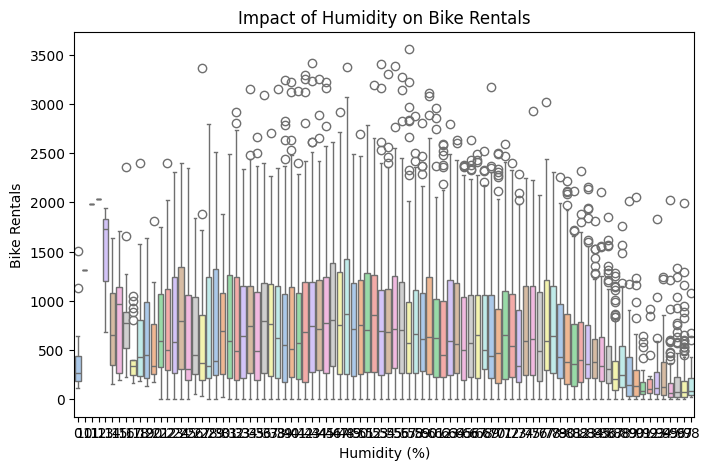

In [34]:
# Humidity vs. Bike Rentals (Box Plot)

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Humidity(%)'], y=df['Rented Bike Count'], palette="pastel")
plt.xlabel("Humidity (%)")
plt.ylabel("Bike Rentals")
plt.title("Impact of Humidity on Bike Rentals")
plt.show()

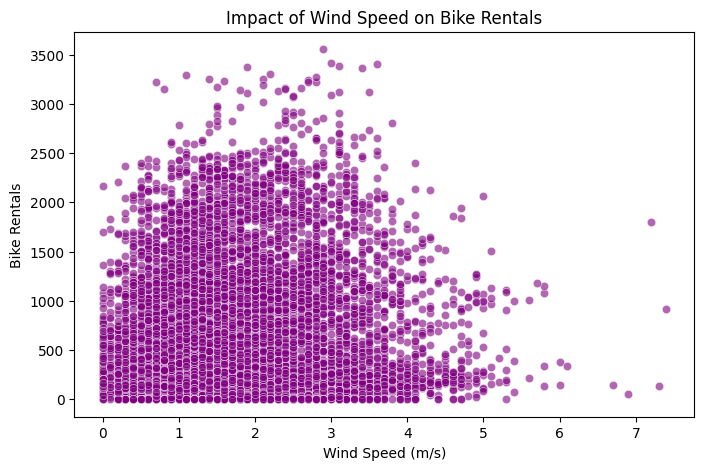

In [35]:
# Wind Speed vs. Bike Rentals (Scatter Plot)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Wind speed (m/s)'], y=df['Rented Bike Count'], color="purple", alpha=0.6)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Bike Rentals")
plt.title("Impact of Wind Speed on Bike Rentals")
plt.show()

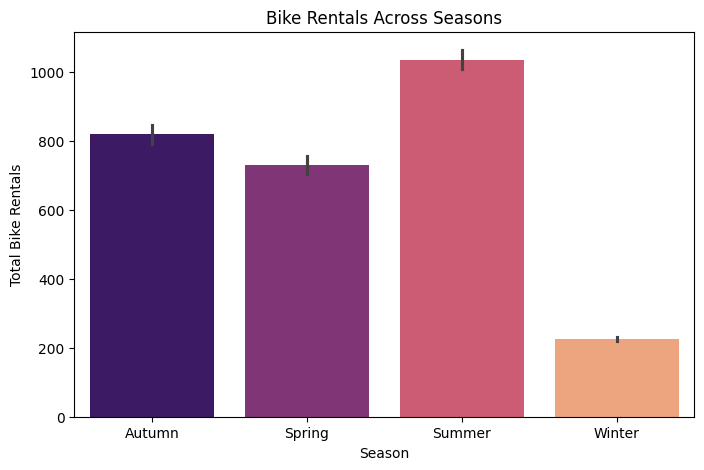

In [36]:
# Bike Rentals by Seasons (Bar Plot)

plt.figure(figsize=(8, 5))
sns.barplot(x=df['Seasons'], y=df['Rented Bike Count'], palette="magma", order=df.groupby("Seasons")["Rented Bike Count"].sum().index)
plt.xlabel("Season")
plt.ylabel("Total Bike Rentals")
plt.title("Bike Rentals Across Seasons")
plt.show()

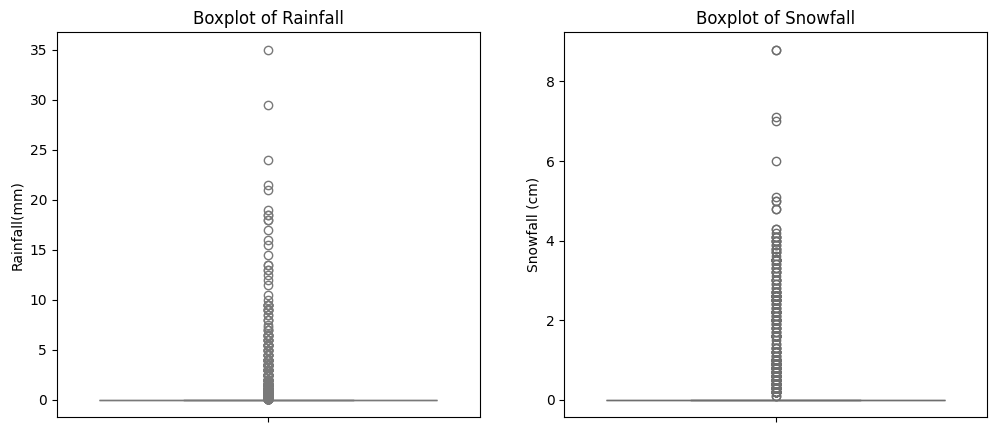

In [37]:
# Effect of Rainfall & Snowfall (Box Plot)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Rainfall(mm)'], color="lightblue")
plt.title("Boxplot of Rainfall")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Snowfall (cm)'], color="lightcoral")
plt.title("Boxplot of Snowfall")

plt.show()

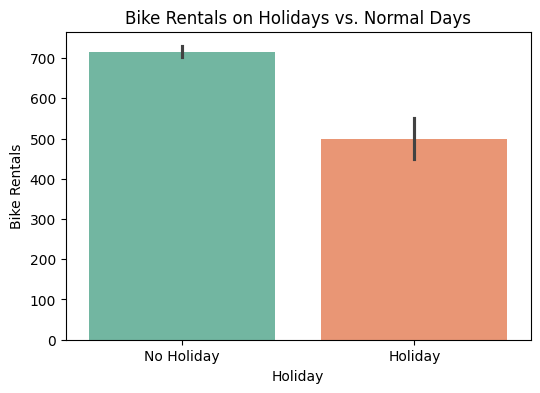

In [38]:
# Holiday vs. Bike Rentals (Bar Plot)

plt.figure(figsize=(6, 4))
sns.barplot(x=df['Holiday'], y=df['Rented Bike Count'], palette="Set2")
plt.xlabel("Holiday")
plt.ylabel("Bike Rentals")
plt.title("Bike Rentals on Holidays vs. Normal Days")
plt.show()

## Data Preprocessing

In [52]:
# Date conversion

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekDay'] = df['Date'].dt.day_name()
mapping_dictDay = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df['WeekDayEncoding'] = df['WeekDay'].map(mapping_dictDay)

In [53]:
# Dropping Date column

df.drop('Date', axis=1, inplace=True)

In [54]:
# Ignoring non rental days

df=df[df['Functioning Day']!=0]

In [55]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [56]:
X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

In [57]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [58]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [59]:
Linear_reg = LinearRegression()
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()
Decision_tree = DecisionTreeRegressor()
Svr = SVR()
Knn = KNeighborsRegressor()

In [60]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

Score

[0.5828473580329514,
 0.9431490302085876,
 0.9348911220248497,
 0.6944150153156525,
 0.8698419822812892,
 0.9241547080316475,
 0.8599279617464775,
 0.0757838720997166,
 0.5578772771064464]

## Model Evaluation

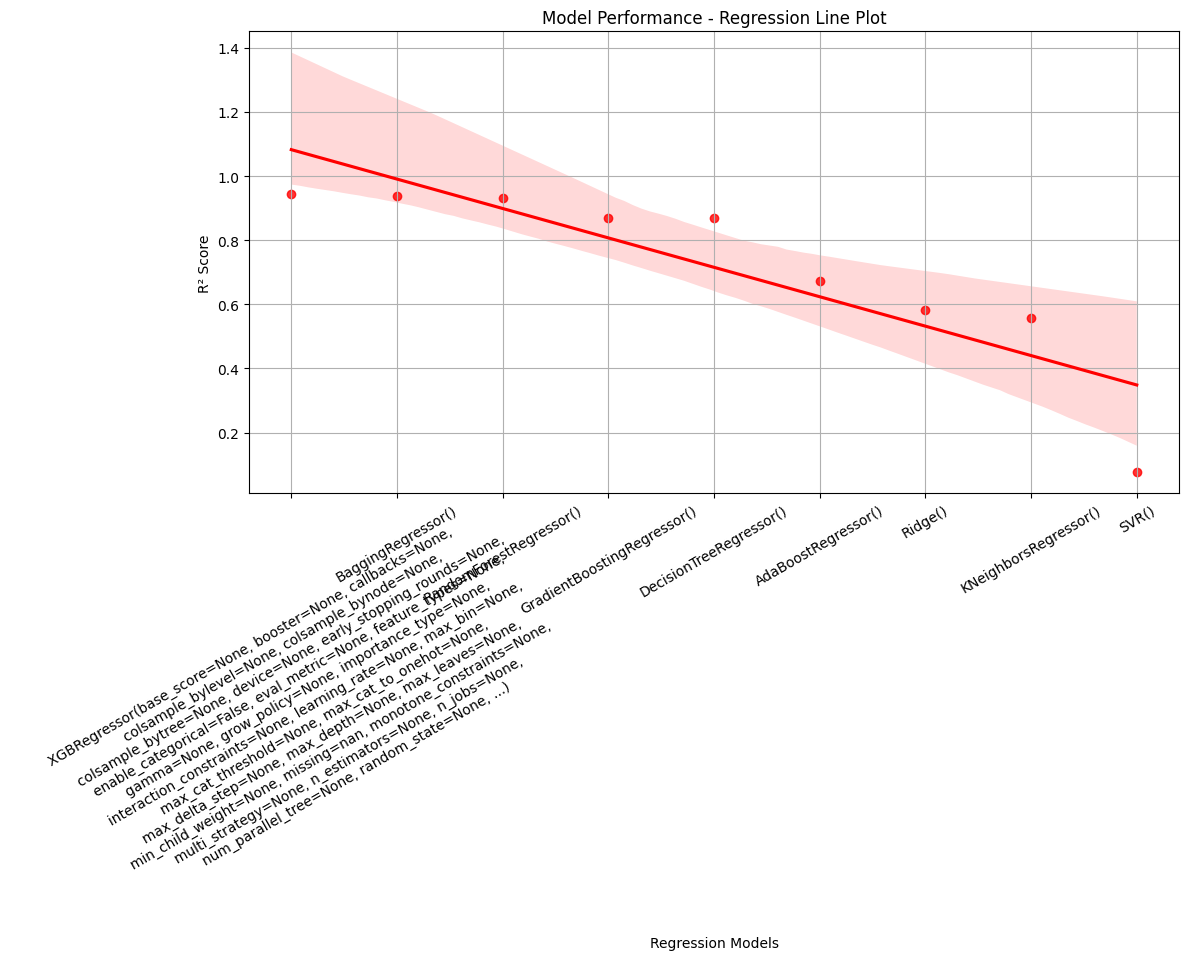

In [63]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

df_scores = pd.DataFrame({'Model': model_li, 'R2 Score': Score})
df_scores = df_scores.sort_values(by='R2 Score', ascending=False)

# Regression line

plt.figure(figsize=(12, 6))
sns.regplot(x=list(range(len(df_scores))), y=df_scores['R2 Score'], 
            scatter=True, marker="o", fit_reg=True, color="red")

plt.xticks(range(len(df_scores)), df_scores['Model'], rotation=30)
plt.xlabel("Regression Models")
plt.ylabel("R² Score")
plt.title("Model Performance - Regression Line Plot")
plt.grid(True)
plt.show()